In [15]:
import pandas as pd

# Load the dataset
file_path = "E:\\WineQT.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [17]:
# Check column names
print(df.columns)

# Rename columns if necessary
df.columns = df.columns.str.strip()

# Check data types
print(df.dtypes)

# Check class distribution of wine quality
print(df['quality'].value_counts())

# Convert wine quality into binary classification (Good: 1, Bad: 0)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Verify changes
print(df['quality'].value_counts())


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64
quality
1    621
0    522
Name: count, dtype: int64


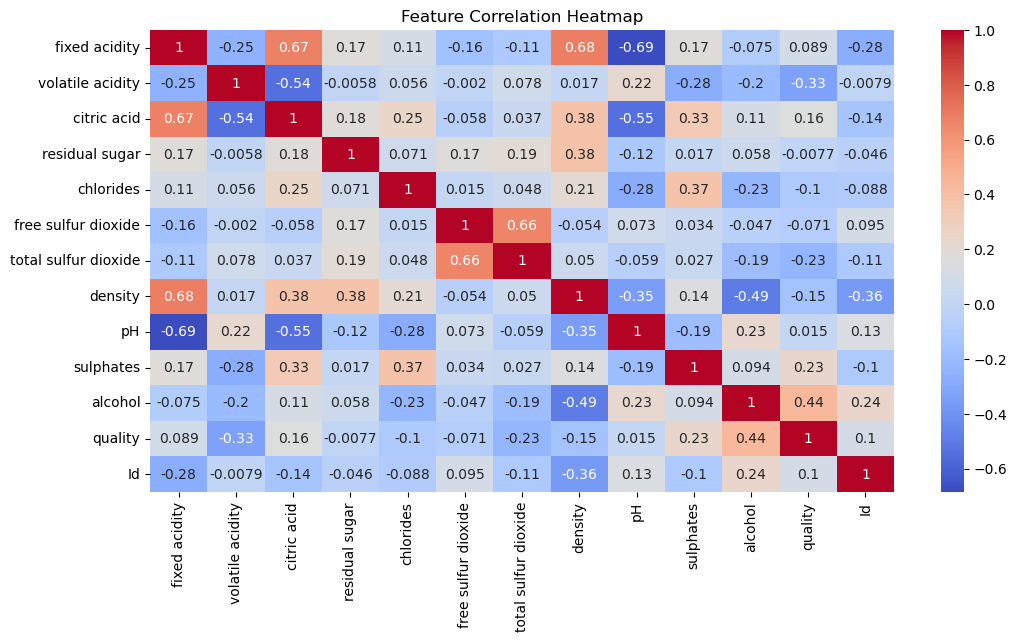

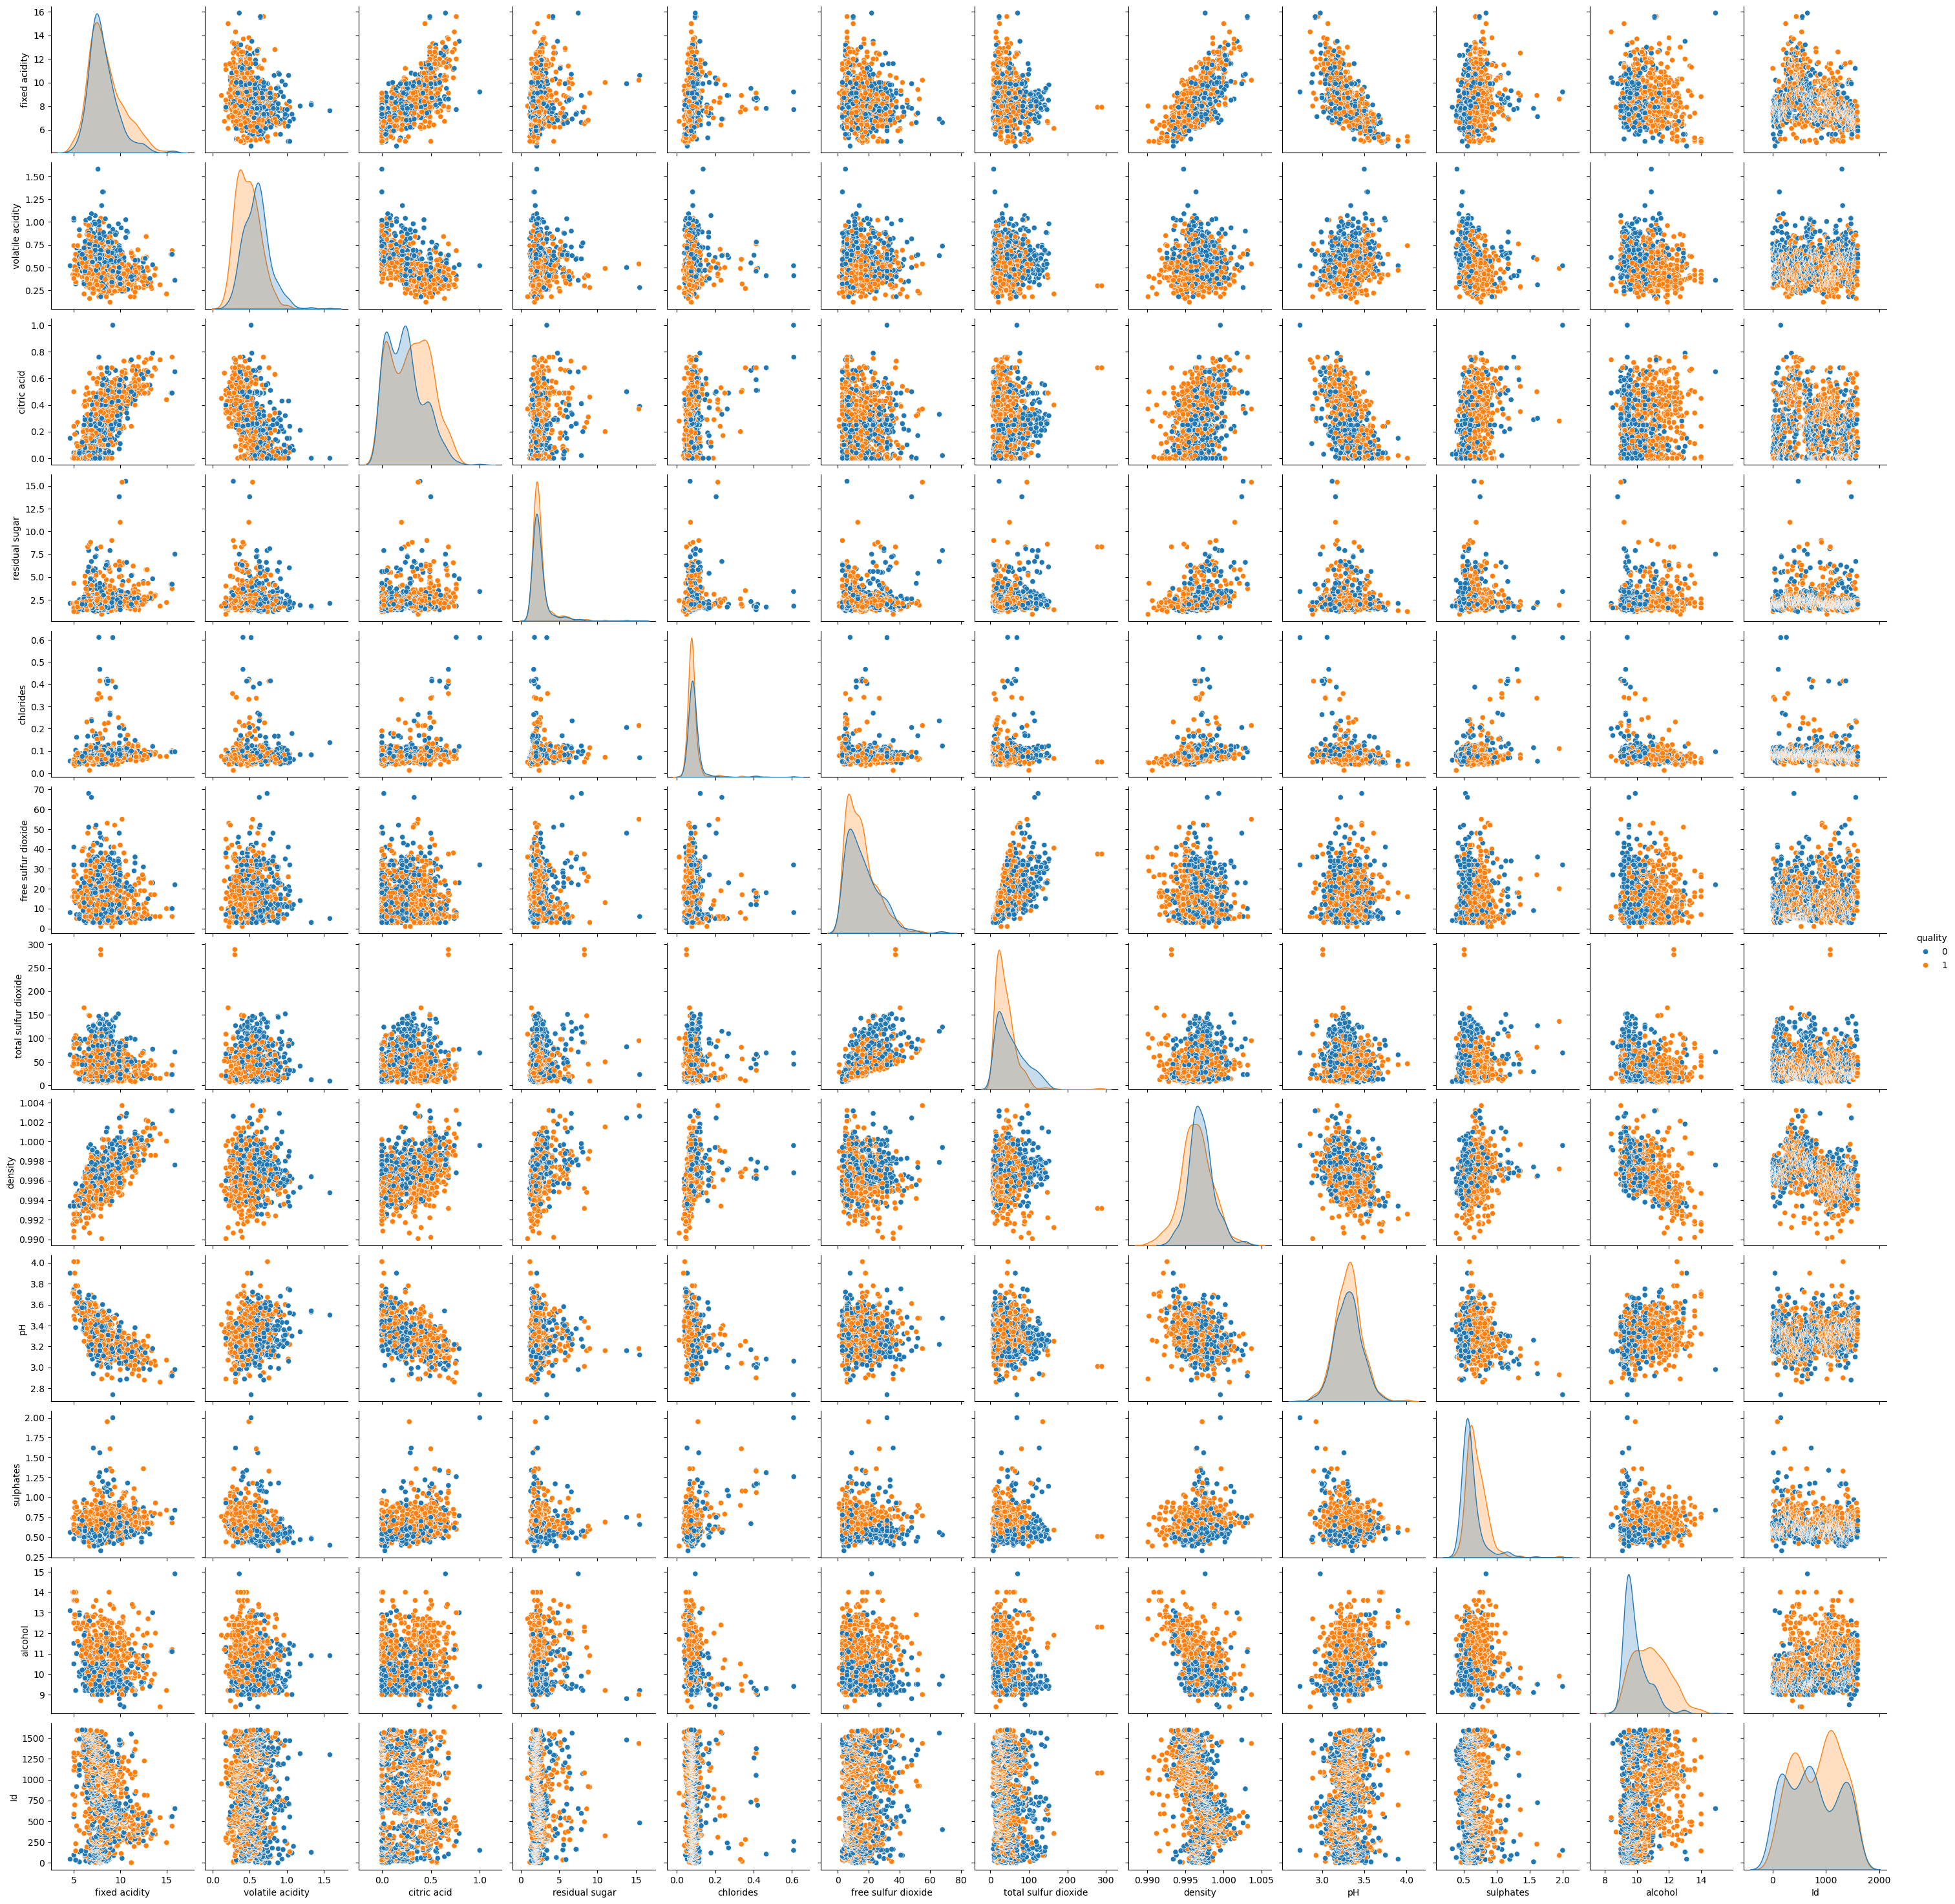

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot of important features
sns.pairplot(df, hue="quality")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (914, 12)
Test set size: (229, 12)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
sgd = SGDClassifier(loss="hinge", random_state=42)
svc = SVC(kernel="linear")

# Train models
rf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)
sgd_preds = sgd.predict(X_test)
svc_preds = svc.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_preds))
print(classification_report(y_test, sgd_preds))

print("SVC Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


Random Forest Accuracy: 0.7816593886462883
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.80      0.80      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

SGD Classifier Accuracy: 0.4279475982532751
              precision    recall  f1-score   support

           0       0.43      0.93      0.59       102
           1       0.30      0.02      0.04       127

    accuracy                           0.43       229
   macro avg       0.37      0.48      0.32       229
weighted avg       0.36      0.43      0.29       229

SVC Accuracy: 0.7510917030567685
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       102
           1       0.78      0.76      0.77       127

    accuracy                           0.75       229
   macro

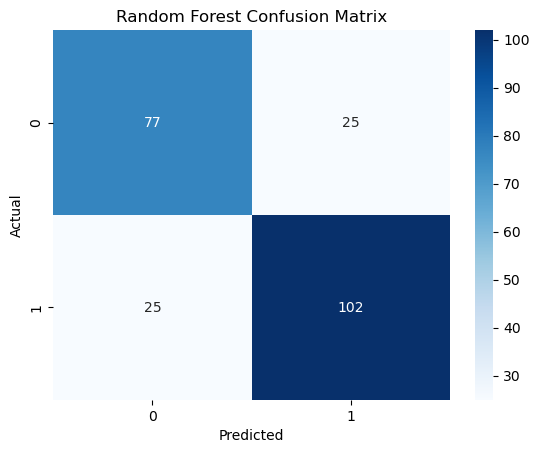

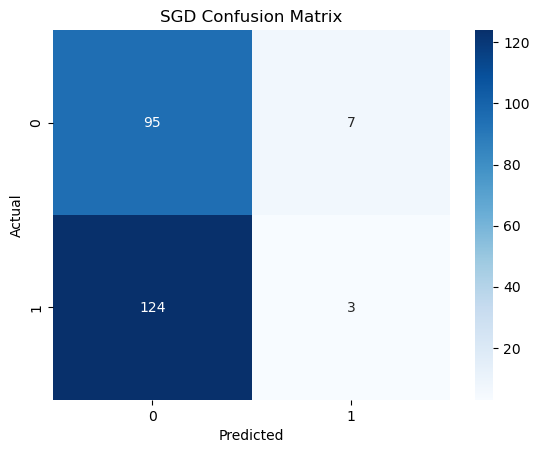

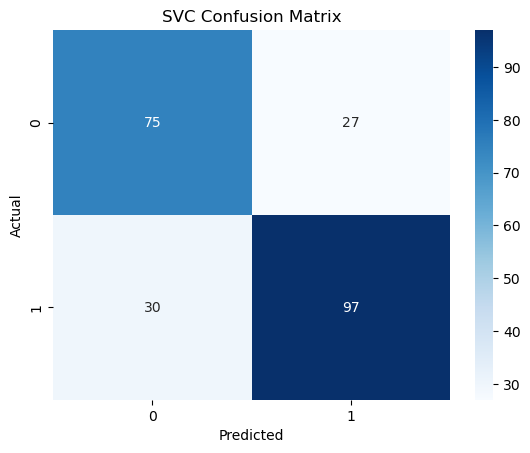

In [26]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, sgd_preds, "SGD Confusion Matrix")
plot_confusion_matrix(y_test, svc_preds, "SVC Confusion Matrix")
